##Bring in libraries and dataframes and set indexes

In [3]:
import datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoTemp_df')

## Set time slice to graph

In [5]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 10
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2015-08-18 08:45:00')

##Graph all sensors to check for anomolies

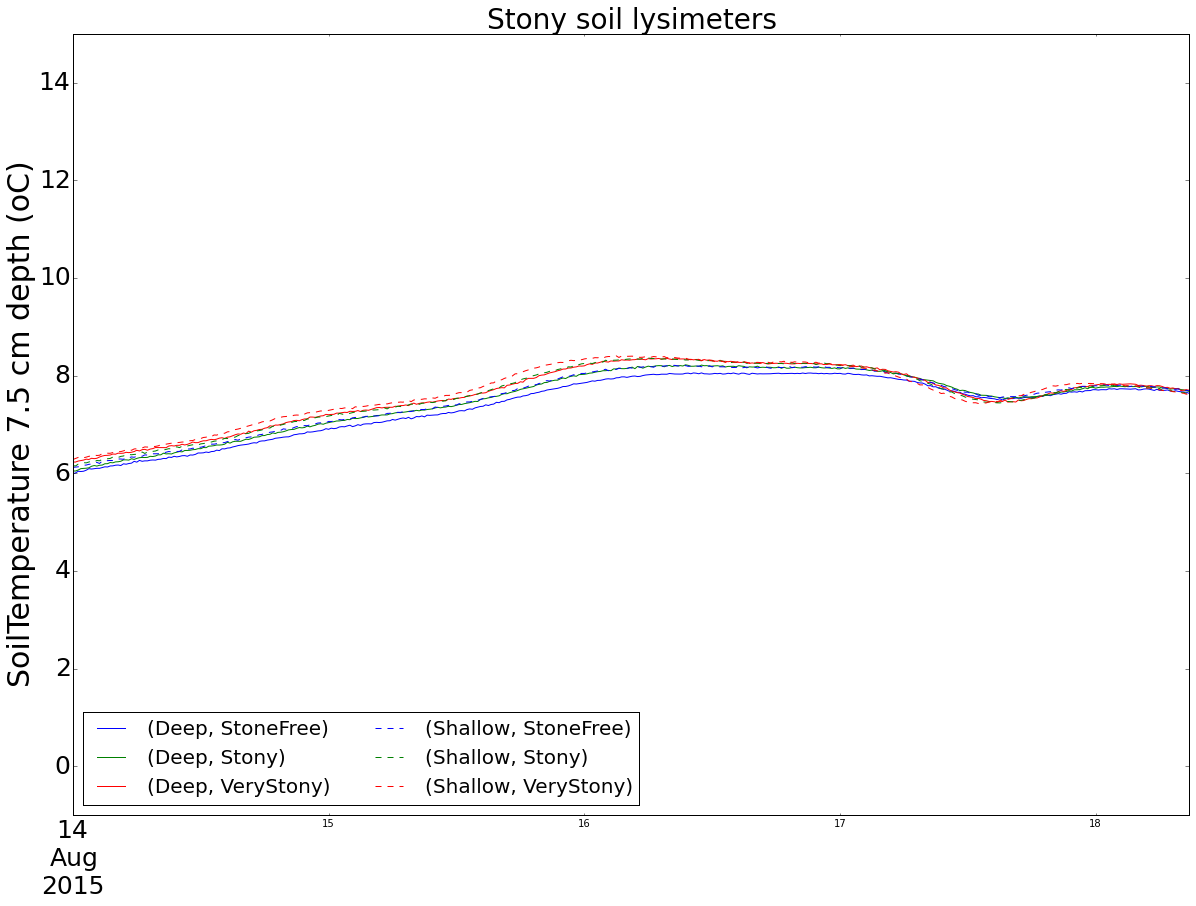

In [15]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function
#DataMeans.where(DataMeans<0.7,np.nan,inplace=True)

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.ix[:,'D1'] * 150 + \
               DataMeans.ix[:,'D2'] * 150 + \
               DataMeans.ix[:,'D3'] * 150 + \
               DataMeans.ix[:,'D4'] * 150 
                
DataMeans.D4.ix['2015-08-14':].plot(figsize=(20,14),style=['b-','g-','r-','b--','g--','r--'],ylim=(-1,15))
plt.ylabel('SoilTemperature 7.5 cm depth (oC)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=3, ncol=2)

In [7]:

##Graph treatment means by layer

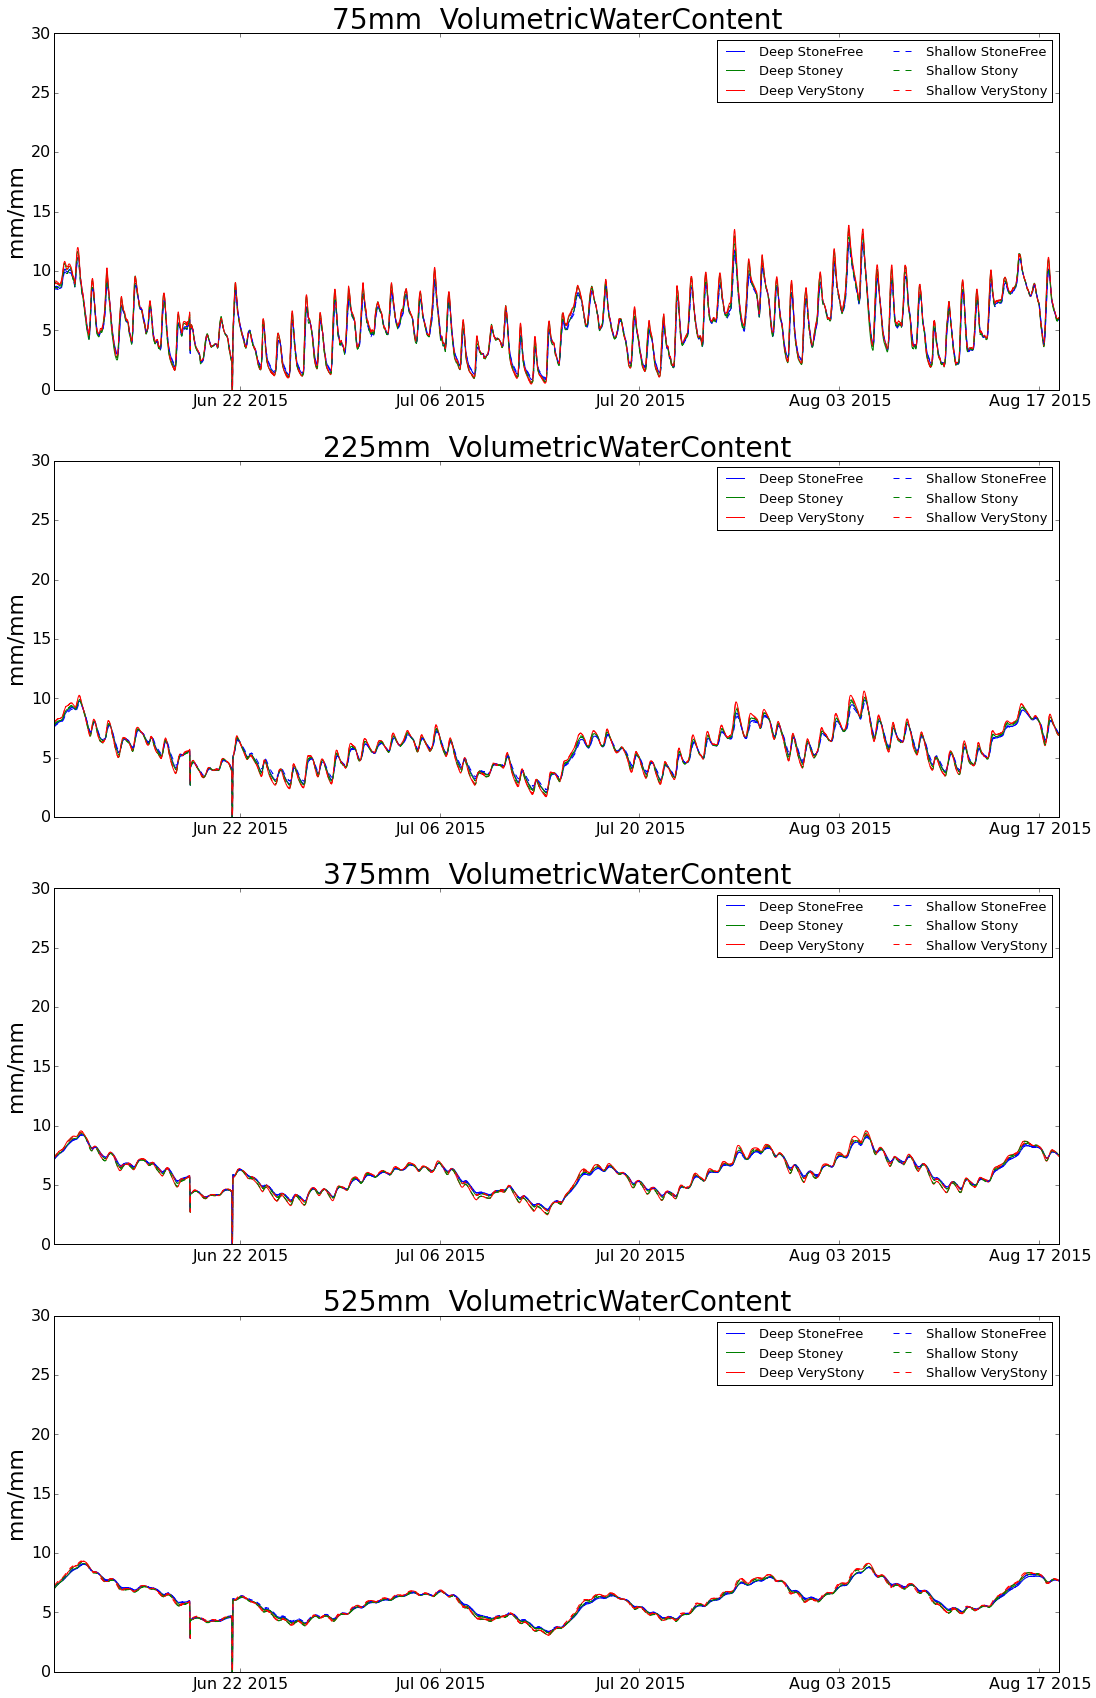

In [8]:
MeanLookSlice =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Gravels','Stones','Depth'],axis=1).mean()

MeanLookSlice = MeanLookSlice.ix[StartDateString:]
#MeanLookSlice.where(MeanLookSlice<0.7,np.nan,inplace=True)


Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, LayerThickness, Ymax, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','g','r','b','g','r'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.Stony.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep Stoney');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.VeryStony.ix[StartDateString:,Depth]*LayerThickness,'-', label='Deep VeryStony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.Stony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow Stony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.VeryStony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow VeryStony');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,Ymax);
        plt.legend(loc=1, fontsize=13, ncol=2)
        return;

MakePlot(1,'D1',1,30, '75mm')
MakePlot(2,'D2',1,30, '225mm')
MakePlot(3,'D3',1,30, '375mm')
MakePlot(4,'D4',1,30, '525mm')

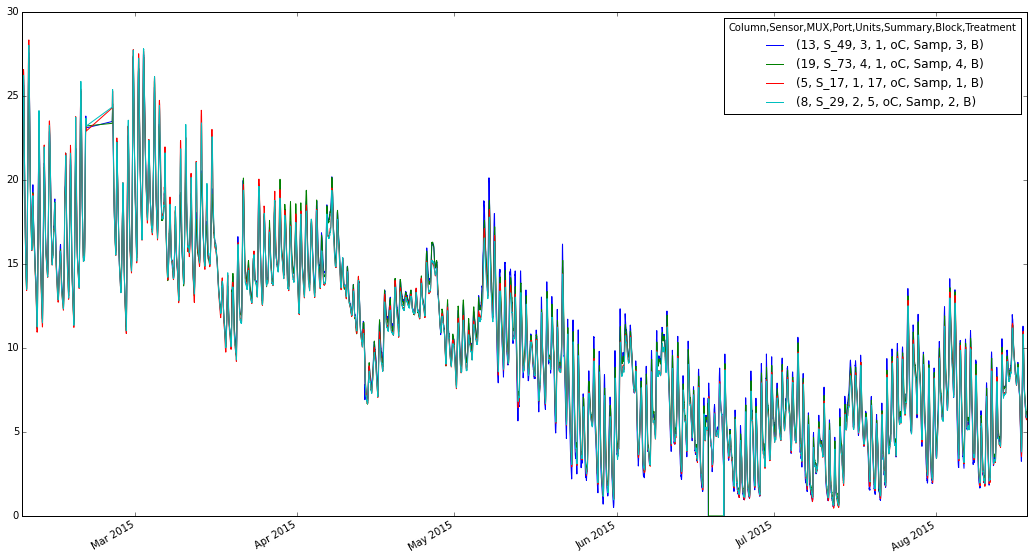

In [9]:
Data.ix['2014-11-05 08:00:00':,('D1','Deep','Stony')].plot(figsize=(18,10))

In [10]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [11]:
!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb

https://gist.github.com/604c4dfd746733297790
